![ITC-Hotels-gallery-img-2016-07-08-08-54-44.png](https://i.postimg.cc/VvtGf2t2/ITC-Hotels-gallery-img-2016-07-08-08-54-44.png)

**WEB SCRAPING ITC LUXURY HOTEL DATA FROM TRIPADVISOR AND PERFORMING EXPLORATORY DATA ANALYSIS ON SCRAPED DATA**

![image.png](https://i.postimg.cc/L8gLpnbK/image.png)

## Importing libraries

In [2]:
!pip install requests --upgrade --quiet
!pip install beautifulsoup4 --upgrade --quiet
!pip install arcgis --quiet
!pip install folium --quiet
!pip install matplotlib --upgrade --quiet
!pip install squarify --upgrade --quiet
!pip install nltk --quiet
!pip install contractions --quiet
!pip install textblob --upgrade --quiet
!pip install wordcloud --quiet

In [3]:
import requests    #to download the html page
from bs4 import BeautifulSoup    #to parse html page
import pandas as pd   #for data manipulation
import re    #for describing a search pattern
from arcgis.gis import GIS   
from arcgis.geocoding import geocode #for finding coordinates
import numpy as np   #for numerical calculations
import folium   #to visualize geospatial data
import matplotlib.pyplot as plt   #for data visualization
import squarify   #for treemap layout visualization
import seaborn as sns   #for data visualization
from datetime import datetime   #for formatting strings into date time objects
import nltk    #for nlp 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer   #for lemmatization
import contractions   #expanding and creating common English contractions in text
from textblob import TextBlob  #for processing textual data
from wordcloud import WordCloud   #for representing text data
import collections   #provides different types of containers
from nltk.util import ngrams   #to generate ngrams

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## Scraping - Part 1 

**Web scraping** is the process of collecting and parsing raw data from the web so it can later be used for purposes like analysis etc. Python is a great language to scrape data.

In [2]:
#list of links to scrape data
links = ['https://www.tripadvisor.in/Hotel_Review-g297628-d301774-Reviews-or{}-ITC_Windsor_Bengaluru_a_Luxury_Collection_Hotel-Bengaluru_Bangalore_District_Karnataka.html',
      'https://www.tripadvisor.in/Hotel_Review-g304551-d301777-Reviews-or{}-ITC_Maurya_a_Luxury_Collection_Hotel_New_Delhi-New_Delhi_National_Capital_Territory_of_.html',
      'https://www.tripadvisor.in/Hotel_Review-g312681-d307512-Reviews-or{}-ITC_Grand_Goa_A_Luxury_Collection_Resort_Spa-Cansaulim_South_Goa_District_Goa.html',
      'https://www.tripadvisor.in/Hotel_Review-g297615-d7200149-Reviews-or{}-ITC_Grand_Bharat_A_Luxury_Collection_Retreat_Gurugram-Gurugram_Gurgaon_Gurgaon_Distric.html',
      'https://www.tripadvisor.in/Hotel_Review-g304555-d301772-Reviews-or{}-ITC_Rajputana_Jaipur_a_Luxury_Collection_Hotel-Jaipur_Jaipur_District_Rajasthan.html',
      'https://www.tripadvisor.in/Hotel_Review-g304556-d2534781-Reviews-or{}-ITC_Grand_Chola_Chennai_a_Luxury_Collection_Hotel-Chennai_Madras_Chennai_District_Tami.html',
      'https://www.tripadvisor.in/Hotel_Review-g297683-d301771-Reviews-or{}-ITC_Mughal_Agra_a_Luxury_Collection_Hotel-Agra_Agra_District_Uttar_Pradesh.html',
      'https://www.tripadvisor.in/Hotel_Review-g304554-d503409-Reviews-or{}-ITC_Grand_Central_Mumbai_a_Luxury_Collection_Hotel-Mumbai_Maharashtra.html',
      'https://www.tripadvisor.in/Hotel_Review-g304554-d301778-Reviews-or{}-ITC_Maratha_Mumbai_a_Luxury_Collection_Hotel-Mumbai_Maharashtra.html',
      'https://www.tripadvisor.in/Hotel_Review-g297586-d301773-Reviews-or{}-ITC_Kakatiya_Hyderabad_a_Luxury_Collection_Hotel-Hyderabad_Hyderabad_District_Telangana.html',
      'https://www.tripadvisor.in/Hotel_Review-g297586-d14008273-Reviews-or{}-ITC_Kohenur_Hyderabad_a_Luxury_Collection_Hotel-Hyderabad_Hyderabad_District_Telangan.html',
      'https://www.tripadvisor.in/Hotel_Review-g297628-d1567342-Reviews-or{}-ITC_Gardenia_Bengaluru_a_Luxury_Collection_Hotel-Bengaluru_Bangalore_District_Karnatak.html',
      'https://www.tripadvisor.in/Hotel_Review-g304558-d301775-Reviews-or{}-ITC_Sonar_Kolkata_a_Luxury_Collection_Hotel-Kolkata_Calcutta_Kolkata_District_West_Beng.html',
      'https://www.tripadvisor.in/Hotel_Review-g304558-d17378938-Reviews-or{}-ITC_Royal_Bengal_A_Luxury_Collection_Hotel-Kolkata_Calcutta_Kolkata_District_West_Ben.html',
      'https://www.tripadvisor.in/Hotel_Review-g304551-d299757-Reviews-or{}-Sheraton_New_Delhi_Hotel-New_Delhi_National_Capital_Territory_of_Delhi.html']

In [5]:
#initialize lists
namelst, ranklst, addresslst, ratinglst, languagelst, stylelst, restaurantlst, attractlst, pricelst, roomlst = ([] for x in range(10))

def scrape_hotels(links):
    for i in links: #iterate through links
        response = requests.get(i)            # Download the page
        if response.status_code != 200:       # Check if successful response
            raise Exception('Failed to load page {}'.format(i))
        doc = BeautifulSoup(response.text, 'html.parser')   # parse html page

        name = doc.find_all('h1',{'class':'_1mTlpMC3'}) #scrape hotel name
        rank = doc.find_all('div',{'class':'_1vpp5J_x'}) #scrape hotel rank
        address = doc.find_all('span',{'class':'_3ErVArsu jke2_wbp'}) #scrape hotel address
        rating = doc.find_all('span',{'class':'_3cjYfwwQ'}) #scrape hotel rating
        for p,q,r,s in zip(name,rank,address,rating): 
            namelst.append(p.text)
            ranklst.append(q.text)
            addresslst.append(r.text)
            ratinglst.append(s.text)
            
        lang_style = doc.find_all('div',{'class':'_2dtF3ueh'}) #scrape languages spoken and hotel styles
        languagelst.append(lang_style[-1].text)
        temp = []
        for j in lang_style[:-1]:
            temp.append(j.text)
            style = ','.join(temp)
        stylelst.append(style[1:])

        restaurant = doc.find_all('span',{'class':'oPMurIUj TrfXbt7b'}) #scrape restuarants nearby
        if restaurant == []:
            restaurantlst.append("")
        else:
            restaurantlst.append(restaurant[0].text)
        attraction = doc.find_all('span',{'class':'oPMurIUj _1WE0iyL_'}) #scrape attractions nearby
        if attraction == []:
            attractlst.append("")
        else:
            attractlst.append(attraction[0].text)

        price_room = doc.find_all('div',{'class':'_1NHwuRzF'}) #scrape hotel price range and no of rooms
        pricelst.append(price_room[0].text)
        roomlst.append(price_room[-1].text)
    
    hotel = {
            'hotel_name' : namelst,
            'hotel_rank' : ranklst,
            'hotel_address' : addresslst,
            'rating' : ratinglst,
            'languages_spoken' : languagelst,
            'hotel_style' : stylelst,
            'restaurants_nearby' : restaurantlst,
            'attractions_nearby' : attractlst,
            'price_range' : pricelst,
            'no_of_rooms' : roomlst
            }
    
    return pd.DataFrame(hotel) #dataframe consisting of 10 columns

In [6]:
#result1 = scrape_hotels(links)

In [8]:
#result1.to_csv('hotels.csv',index=None)

## Scraping : Part 2

In [6]:
review_titlelst,date_of_staylst,reviewslst,ratinglst = ([] for x in range(4))

def scrape_reviews(links):
    for i in links:  
        for j in range(0,1001,5):
            url = i.format(j)
            response = requests.get(url)
            doc = BeautifulSoup(response.text, 'html.parser') 
            reviews = doc.find_all('q',{'class':"IRsGHoPm"}) #scrape hotel review
            rating = doc.find_all('div',{'class':"nf9vGX55"}) #scrape review rating
            date_of_stay = doc.find_all('span',{'class':"_34Xs-BQm"}) #scrape date of stay
            review_title = doc.find_all('div',{'class':"glasR4aX"})  #scrape review title

            for p,q,r,s in zip(review_title,date_of_stay,reviews,rating):
                review_titlelst.append(p.text)
                date_of_staylst.append(q.text)
                reviewslst.append(r.text)
                ratinglst.append(s.find('span').attrs['class'][1])
            
    reviews = {
            'review_title' : review_titlelst,
            'date_of_stay': date_of_staylst,
            'review_text' :reviewslst,
            'rating' : ratinglst
              }
    
    return pd.DataFrame(reviews) #dataframe consisting of 4 columns

In [7]:
#result2 = scrape_reviews(links)

In [9]:
#result2.to_csv('hotel_reviews.csv',index=None)

## Data Cleaning : Part 1

In [4]:
data = pd.read_csv('hotels.csv')
data.head()

,hotel_name,hotel_rank,hotel_address,rating,languages_spoken,hotel_style,restaurants_nearby,attractions_nearby,price_range,no_of_rooms
0,"ITC Windsor, Bengaluru - a Luxury Collection H...","#6 of 1,715 Hotels in Bengaluru","25 Windsor Square, Bengaluru 560052 India",5.0,"English, Hindi","Classic,Historic Hotel",115.0,16.0,US$101 - US$198 (Based on Average Rates for a ...,240
1,"ITC Maurya, a Luxury Collection Hotel, New Delhi","#9 of 1,978 Hotels in New Delhi","Diplomatic Enclave Sadar Patel Marg, New Delhi...",4.5,"English, Hindi","Business,Family",29.0,5.0,US$139 - US$222 (Based on Average Rates for a ...,437
2,ITC Grand Goa - A Luxury Collection Resort & Spa,#2 of 6 Hotels in Cansaulim,"Arossim Beach, Cansaulim 403712 India",4.5,"English, Hindi",Great View,19.0,1.0,US$125 - US$343 (Based on Average Rates for a ...,252
3,"ITC Grand Bharat A Luxury Collection Retreat, ...",#8 of 756 Hotels in Gurugram (Gurgaon),"Hasanpur, Tauru Mewat District, Gurugram (Gurg...",4.5,"English, Hindi","Luxury,Hidden Gem",NaN,NaN,US$193 - US$459 (Based on Average Rates for a ...,104
4,"ITC Rajputana, Jaipur - a Luxury Collection Hotel",#32 of 962 Hotels in Jaipur,"Palace Road, Jaipur 302006 India",4.5,"English, Hindi","Family,Art Deco Style",91.0,3.0,US$63 - US$180 (Based on Average Rates for a S...,218


In [6]:
data.shape

(15, 10)

This dataset contains 15 rows and 10 columns

In [7]:
data.isnull().sum() #check for null values

hotel_name            0
hotel_rank            0
hotel_address         0
rating                0
languages_spoken      0
hotel_style           3
restaurants_nearby    1
attractions_nearby    1
price_range           0
no_of_rooms           0
dtype: int64

In [8]:
data.fillna("NA", inplace = True) #fill null values with 'NA'

In [9]:
# Price range for hotels given in US dollars are converted into Indian Rupees

min_price = []
max_price = []
for i in data.price_range:
    temp = re.findall(r'\b\d+\b',i)
    min_price.append(int(temp[0])*72) 
    max_price.append(int(temp[1])*72)
    
data.drop(['price_range'], axis = 1, inplace = True)
data['min_price(₹)'] = min_price
data['max_price(₹)'] = max_price

In [10]:
name = []
for i in data.hotel_name:
    name.append(i.split("-")[0])
    
data['hotel_name'] = name

In [11]:
# Latitudes and longitudes needed for plotting a map are obtained using hotel addresses

lat = []
long = []
for i in data.hotel_address:
    result = geocode(i)
    temp = result[0]['location']
    lat.append(temp['x'])
    long.append(temp['y'])
    
data['latitude'] = lat
data['longitude'] = long

In [12]:
# Categorical variables languages_spoken and hotel_style are encoded 

def encoding_cat(col_values,col):
    temp1 = []
    for i in col_values:
        temp2=[]
        for j in col:
            if j in i:
                temp2.append(1)
            else:
                temp2.append(0)
        temp1.append(temp2)
    t1= []
    for i in range(len(col)):
        t2=[]
        for j in temp1:
            t2.append(j[i])
        t1.append(t2)

    dic= {}
    for i,j in enumerate(col):
        dic[j]=t1[i]

    return pd.DataFrame(dic)

In [13]:
style = ['Family','Park View','Business','Art Deco Style','City View','Luxury','Hidden Gem',
         'Classic','Green','Historic Hotel','Great View'] 

languages = ['English','Hindi','Japanese','Spanish','Nepali','Tamil']

In [14]:
encoding_cat(data.languages_spoken,languages) # encoded languages

,English,Hindi,Japanese,Spanish,Nepali,Tamil
0,1,1,0,0,0,0
1,1,1,0,0,0,0
2,1,1,0,0,0,0
3,1,1,0,0,0,0
4,1,1,0,0,0,0
5,1,1,0,0,0,1
6,1,1,0,0,0,0
7,1,1,0,0,0,0
8,1,1,0,0,0,0
9,1,1,0,0,0,0


In [15]:
encoding_cat(data.hotel_style,style) # encoded styles

,Family,Park View,Business,Art Deco Style,City View,Luxury,Hidden Gem,Classic,Green,Historic Hotel,Great View
0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,1,0,0,0
6,1,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,1,0,0
9,0,0,1,0,0,0,0,1,0,0,0


In [12]:
#data.to_csv('hotels_cleaned.csv',index=None)

## Exploratory data analysis : Part 1

In [16]:
data1 = pd.read_csv('hotels_cleaned.csv')
data1.head()

,hotel_name,hotel_rank,hotel_address,rating,languages_spoken,hotel_style,restaurants_nearby,attractions_nearby,no_of_rooms,min_price(₹),max_price(₹),latitude,longitude
0,"ITC Windsor, Bengaluru","#6 of 1,715 Hotels in Bengaluru","25 Windsor Square, Bengaluru 560052 India",5.0,"English, Hindi","Classic,Historic Hotel",115.0,16.0,240,7272,14256,77.585116,12.993709
1,"ITC Maurya, a Luxury Collection Hotel, New Delhi","#9 of 1,978 Hotels in New Delhi","Diplomatic Enclave Sadar Patel Marg, New Delhi...",4.5,"English, Hindi","Business,Family",29.0,5.0,437,10008,15984,77.183589,28.594970
2,ITC Grand Goa,#2 of 6 Hotels in Cansaulim,"Arossim Beach, Cansaulim 403712 India",4.5,"English, Hindi",Great View,19.0,1.0,252,9000,24696,73.892750,15.340340
3,"ITC Grand Bharat A Luxury Collection Retreat, ...",#8 of 756 Hotels in Gurugram (Gurgaon),"Hasanpur, Tauru Mewat District, Gurugram (Gurg...",4.5,"English, Hindi","Luxury,Hidden Gem",NaN,NaN,104,13896,33048,77.069140,28.477370
4,"ITC Rajputana, Jaipur",#32 of 962 Hotels in Jaipur,"Palace Road, Jaipur 302006 India",4.5,"English, Hindi","Family,Art Deco Style",91.0,3.0,218,4536,12960,75.777270,26.914695


In [17]:
mapp = folium.Map(location=[data1.longitude.values.mean(), data1.latitude.values.mean()],zoom_start=5)
for p,q,r,s in zip(data1['hotel_name'].values,data1['hotel_rank'].values,data1['latitude'].values,data1['longitude'].values):
    folium.Marker(location = [s,r],popup=q,tooltip=p,icon=folium.Icon(color='darkred',prefix='fa',icon='circle')).add_to(mapp)
mapp

Folium library is used to locate hotels on a map. Latitudes and longitudes needed are obtained using hotel address from arcgis module

- We can zoom in and zoom out to see hotels in a specific region
- If we hover over the icons we see name of that hotel
- On clicking the icon, popup is displayed showing us the rank of hotel in that particular region

**Insights :**
  - **ITC Kohenur, Hyderabad has #1 rank out of 814 hotels in Hyderabad**
  - **11 out of 15 ITC hotels are included in top 10 hotels in their particular region**

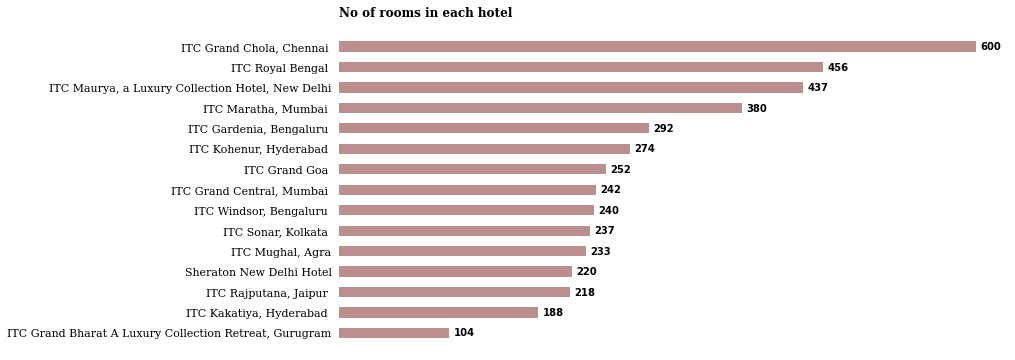

In [18]:
df1 = data1.sort_values("no_of_rooms",ascending = False)

fig, ax = plt.subplots(figsize =(12, 6)) # fig size
plt.barh(df1['hotel_name'].values,df1['no_of_rooms'].values ,color='rosybrown',height = 0.5) # Horizontal Bar Plot
plt.title("No of rooms in each hotel", size=12, loc='left',pad=10,weight='bold', family='serif') # Add Plot Title
for s in ['top', 'bottom', 'left', 'right']: # Remove axes splines
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none') # Remove x,y ticks
ax.yaxis.set_ticks_position('none')
ax.get_xaxis().set_visible(False) #hide x axis
plt.yticks(size=11, family='serif') # customize yticks
for i in ax.patches:  # Add annotation to bars
    plt.text(i.get_width()+4, i.get_y()+0.4, i.get_width(), weight= 'bold')
ax.invert_yaxis();

**Insights :**
- **ITC Grand Chola, Chennai has the highest number of rooms**
- **ITC Grand Bharat, Gurugram has the lowest number of rooms**

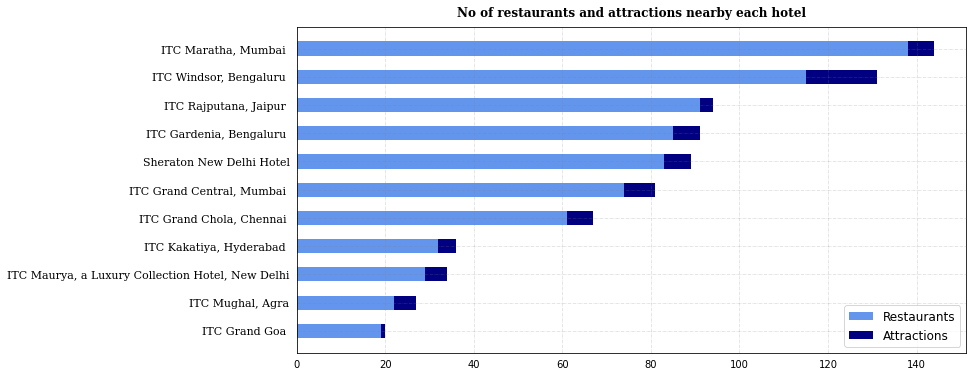

In [19]:
df2 = data1.dropna().reset_index(drop = True)
df2.sort_values(['restaurants_nearby','attractions_nearby'],ascending = False,inplace = True)

fig, ax = plt.subplots(figsize =(12, 6))
plt.barh(df2['hotel_name'].values, df2['restaurants_nearby'].values,height = 0.5,color='cornflowerblue')
plt.barh(df2['hotel_name'].values, df2['attractions_nearby'].values, left=df2['restaurants_nearby'].values,height = 0.5,color='navy')
ax.invert_yaxis()
plt.title("No of restaurants and attractions nearby each hotel", size=12,pad=10, weight='bold', family='serif')
plt.yticks(size=11, family='serif')
plt.legend(['Restaurants','Attractions'],loc='best',fontsize=12)
ax.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none');

**Insights :**
- **ITC Maratha, Mumbai has the most restaurants nearby**
- **ITC Windsor, Bengaluru has the highest no of attractions nearby as compared to other hotels**
- **ITC Grand Goa has the least amount of options to dine out and also there are very few attractions nearby**

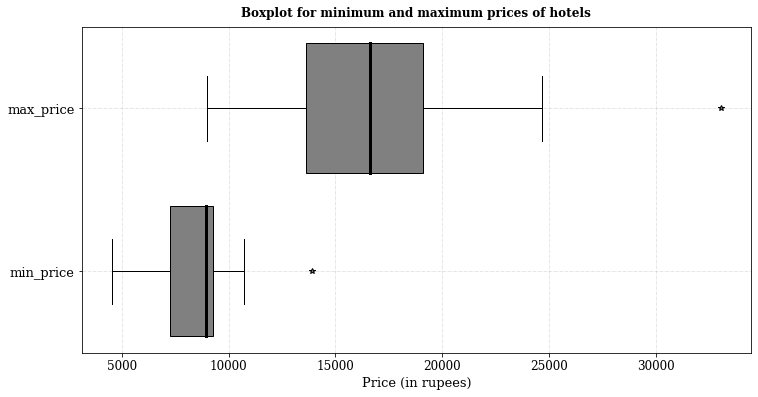

In [20]:
fig, ax = plt.subplots(figsize =(12, 6))

bp = plt.boxplot([data1['min_price(₹)'].values,data1['max_price(₹)'].values],patch_artist=True, vert = 0,widths=[0.8,0.8])
for i in range(len(bp['boxes'])):
    bp['boxes'][i].set(facecolor='grey')
    bp['medians'][i].set(color ='black', linewidth = 3) 
    bp['fliers'][i].set(markerfacecolor='grey', marker='*')

plt.yticks([1,2],['min_price','max_price'],size=13, family='serif')
plt.xticks(size=12, family='serif')
plt.xlabel('Price (in rupees)',size=13, family='serif')
ax.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.title("Boxplot for minimum and maximum prices of hotels", size=12,pad=10, weight='bold', family='serif');

**Insights :**
- **Median price range of hotels is ₹ 9000-16500**
- **Minimum price for ITC hotel is ₹ 4500**
- **Maximum price for ITC hotel goes upto ₹ 33000**

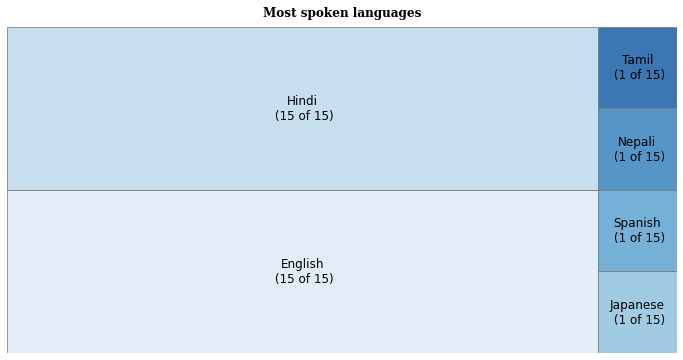

In [21]:
df3 = encoding_cat(data1.languages_spoken,languages)
size = df3.sum().values.tolist()
lang = df3.columns.values.tolist()

fig, ax = plt.subplots(figsize =(12, 6))
lbl = [y+"\n ("+str(x)+' of '+str(len(df3))+')' for x,y in zip(size,lang)]
color_list = sns.color_palette("Blues", 6)
plt.rc('font', size=12)
plt.title("Most spoken languages", size=12,pad=10, weight='bold', family='serif')
squarify.plot(sizes=size, label=lbl ,color =color_list, alpha=.8 ,edgecolor='grey')
plt.axis('off');

**Insights :**
- **Overall 6 languages i.e (English, Hindi, Tamil, Nepali, Spanish, Japanese) are used for communication**
- **Out of 15 hotels, English and Hindi is spoken in every hotel**

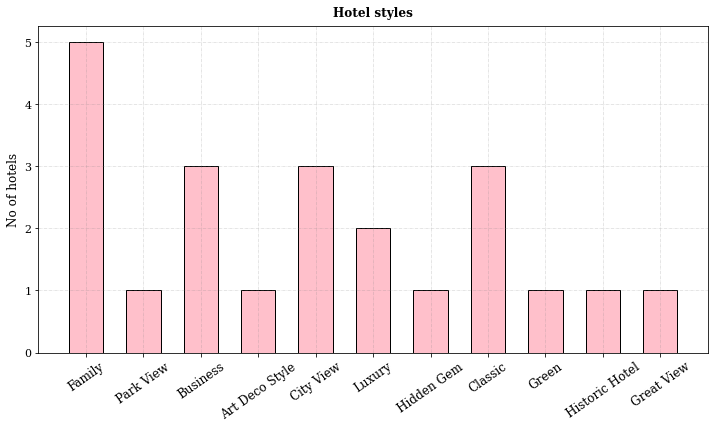

In [22]:
df5 = data1['hotel_style']
df5 = df5.dropna().reset_index(drop = True)
df6 = encoding_cat(df5,style)
freq = df6.sum().values.tolist()
style = df6.columns.values.tolist()

fig, ax = plt.subplots(figsize =(12, 6))
plt.bar(style, freq,width = 0.6,color='pink',edgecolor='black')
plt.title("Hotel styles", size=12,pad=10, weight='bold', family='serif') 
plt.ylabel('No of hotels',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(rotation=35,size=12, family='serif');

**Insights :**
- **Wide category of styles is seen in hotels**
- **Family is the most common style followed by business, classic and cityview**

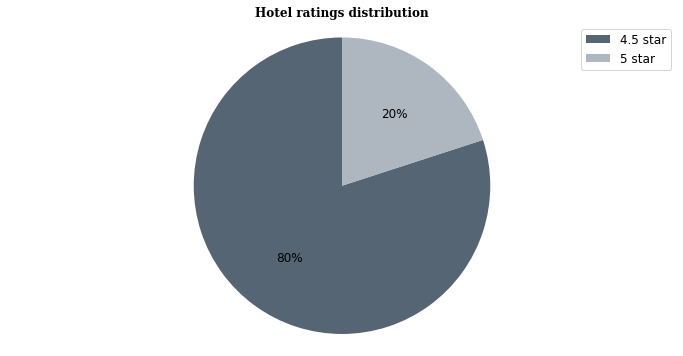

In [23]:
fig, ax = plt.subplots(figsize =(12, 6))
plt.pie(data1.rating.value_counts(), autopct='%1.0f%%', startangle=90,colors =['#566573','#AEB6BF'])
plt.legend(['4.5 star','5 star'])
plt.title("Hotel ratings distribution",size=12, weight='bold', family='serif')
plt.axis('equal');

**Insights :**
- **Each hotel has a rating of above 4.5 out of 5**
- **80% hotels have rating of 4.5** 
- **Rest 20% hotels have rating of 5**

**Q. Does the location, nearby attractions/restaurants, no of rooms affect the price of hotel?**

In [24]:
df7 = data1.fillna(round(data1.mean(),0))

cities = []
for i in df7['hotel_rank']:
    cities.append(i.split(' ')[-1])
metro = ['Bengaluru', 'Delhi', 'Chennai', 'Mumbai', 'Hyderabad', 'Kolkata']
cat = []
for i in cities:
    if i in metro:
        cat.append('Metro')
    else:
        cat.append('Other')
        
xaxis = (df7['min_price(₹)']+df7['max_price(₹)'])/2
yaxis = df7['restaurants_nearby']+df7['attractions_nearby']

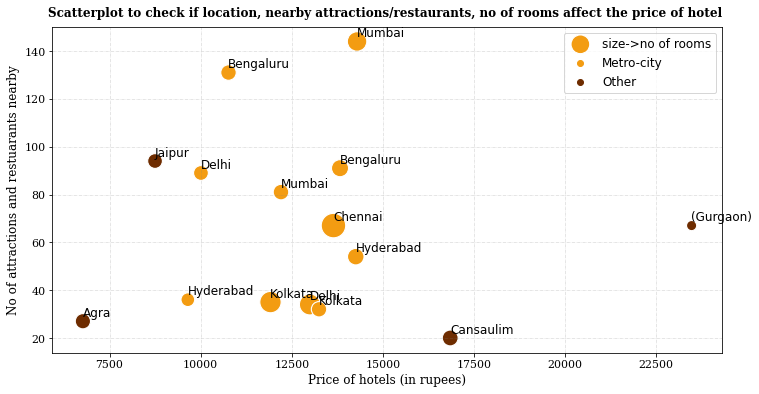

In [25]:
sns.set_palette(sns.color_palette(['#F39C12','#6E2C00']))
fig, ax = plt.subplots(figsize =(12, 6))
sns.scatterplot(y=yaxis, x=xaxis, s = df7['no_of_rooms'], hue=cat)

for i in range(len(df7)):
    plt.annotate(cities[i], (xaxis[i]-5, yaxis[i]+2))

plt.legend(['size->no of rooms','Metro-city','Other'],loc='best',fontsize=12);
plt.ylabel('No of attractions and restuarants nearby',size=12, family='serif')
plt.xlabel('Price of hotels (in rupees)',size=12, family='serif')
plt.title("Scatterplot to check if location, nearby attractions/restaurants, no of rooms affect the price of hotel ", size=12,pad=10, weight='bold', family='serif') 
ax.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif');

**Insights :**
- **We don't see any trend where the location, nearby attractions/restaurants, no of rooms affect the price of hotels**
- **Prices of hotels in metro cities has less variation compared to hotels in non-metro cities**
- **ITC Mughal, Agra is the most affordable hotel**
- **ITC Grand Bharat, Gurgaon is the most expensive hotel**

## Data cleaning : Part 2

In [26]:
data2 = pd.read_csv('hotel_reviews.csv')
data2.head()

,review_title,date_of_stay,review_text,rating
0,The old fashioned way,Date of stay: April 2021,"From, Aniket, Shruti and Aditya THE GOOD - ...",bubble_40
1,Birthdaycation,Date of stay: March 2021,"Excellent hotel, everything thing was upto the...",bubble_50
2,A MEMORABLE EXPERIENCE,Date of stay: March 2021,"All, I will say is, it is a very well located,...",bubble_50
3,Treat of a Retreat,Date of stay: March 2021,A perfect getaway in the heart of the city whi...,bubble_50
4,Best stay I could have asked for!,Date of stay: March 2021,Returning back to Bengaluru after few long hau...,bubble_50


In [28]:
data2.shape

(15020, 4)

This dataset contains 15020 rows and 4 columns

In [29]:
data2.isnull().sum() # check for null values

review_title     1
date_of_stay    80
review_text     10
rating          10
dtype: int64

In [30]:
data2.rating.value_counts() # Imbalanced data

bubble_50    13519
bubble_40      845
bubble_30      253
bubble_10      222
bubble_20      171
Name: rating, dtype: int64

In [31]:
# Before dropping null values check the values, as we have less no of negative reviews
# If randomly dropped we may miss out analyzing quality data 

data2[data2.isnull().any(axis=1)].head(50)

,review_title,date_of_stay,review_text,rating
795,Warm service.,NaN,The hotel is very nice. And also they provided...,bubble_50
796,Good sevinne,NaN,The hotel is very nice. I used to visit often....,bubble_50
797,Best place to spend,NaN,Had an awesome stay at this hotel as i came fo...,bubble_50
798,Nice hotel,NaN,The hotel has good staff and is very helpful a...,bubble_50
799,The service is great,NaN,Very luxury hotel’ very warm welcom from the s...,bubble_50
1045,A very good stay,NaN,Stayed at ITC Maurya at the diplomatic enclave...,bubble_50
1046,Great Hotel & maintaining it’s legacy,NaN,"Finally I was travelling after lockdown, there...",bubble_50
1047,Luxurious hospitality,NaN,Fabulous as usual..my another stay at ITC delh...,bubble_40
1048,Not a good experience,NaN,Check in at the hotel took more than 40 minute...,bubble_30
1049,Short trip @ ITC Maurya,NaN,"Had a short stay at ITC Maurya, New Delhi.. I...",bubble_50


In [32]:
data2.dropna(inplace=True) # drop the null values as most of them were positive

In [33]:
data2["rating"]= data2["rating"].replace('bubble_10', 1)
data2["rating"]= data2["rating"].replace('bubble_20', 2)
data2["rating"]= data2["rating"].replace('bubble_30', 3)
data2["rating"]= data2["rating"].replace('bubble_40', 4)
data2["rating"]= data2["rating"].replace('bubble_50', 5)

In [34]:
data2['date_of_stay'] = data2['date_of_stay'].apply(lambda x : x.split(':')[1].strip())

In [35]:
# Converting string date into datetime and adding those features

data2['year'] = pd.DatetimeIndex(data2['date_of_stay']).year
data2['month'] =pd.DatetimeIndex(data2['date_of_stay']).month

In [36]:
# Text preprocessing 
def text_preprocessing(text):
    
    # custom stopwords --> removed not, nor, don't, won't from stopwords
    stopwords = ['itself', "weren't", 'been', "you'll", "can't", 'll', 'why', 'any', 'too', 'did', 'this', 'than', 'will', 
                 'i', 'which', "i'm", 'shan', 'could', "let's", 'haven', 'him', "she'd", 'for', 'his', 'at', 'had', 'she','you',
                 'were', 'your', 'own', "i've", 'it', 'my', 'those', 'and', 'if', 'yourself', 'a', 'couldn', 'once', "it's", 
                 'needn', 'isn', "you've", 'just', 'theirs', 'can', "that's", "you're", 'now', 'hasn', 't', "hadn't", "th",
                 'themselves', 'then', 'he', 'being', "he'll", 'himself', 'who', 'm', 'between', 'on', "you'd", 'ma', 'about', 
                 'didn', 'ought', 'few', 'while', 'mightn', 'mustn', 'me', 'during', 'myself', 'through', 'weren', "why's", 
                 'an', 'into', "they've", 'by', 'be', 'until', 'off', 'only', 'again', 'has', 'because', 'doing', 'does', 'in',
                 'her', 'wouldn', 'such', "i'll", 'down', "they'd", 'more', 'some', 'where', 'over', "mightn't", 'up',
                 "he's", 'hadn', 'that', 'the', 'these', 'both', 'won', "should've", "he'd", 'each', 'from', 'them', "we'd", 
                 "we'll", 'after', "how's", 'how', 'is', 're', "what's", "where's", 'hers', "she's", 'do', 'here', 'other', 
                 'so', 'yourselves', 've', 'above', 'or', 'with', "they're", 'below', 'under', 'very', 'would', 'what', 'd', 
                 'ourselves', "here's", 'am', 'whom', "that'll", "i'd", 'they', 'its', 'same', 'shouldn', "we're", 'herself', 
                 'was', 'of', "haven't", 'y', 'before', 'ours', 'o', 'have', 'there', 'when', 's', 'their', 'don', 'are', 
                 'all', 'out', 'doesn', 'to', 'ain', 'you', 'but', 'our', 'further', "who's", 'aren', 'wasn', "there's", 
                 'most', 'yours', "when's", "they'll", 'we', "needn't", 'as', 'cannot', 'should', "she'll", 'having', "we've"]

    lemmatizer = WordNetLemmatizer() 

    corpus = []
    for i in text:
        i = re.sub('[^a-zA-Z]', ' ',i) #removal of numbers and symbols(punctuation)
        i = i.lower() #convert to lowercase
        i = i.split() # split sentence review into list of words
        i = [lemmatizer.lemmatize(word) for word in i if not word in stopwords] # lemmatization and stopword removal
        i = ' '.join(i) # again join list of words into sentence
        i = contractions.fix(i) #expand contractions
        corpus.append(i)
    return corpus

**Stopwords :** 

Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document, hence we remove them.

Example - “There is a pen on the table”
Now, the words “is”, “a”, “on”, and  “the” add no meaning to the statement while parsing it. Whereas words like “there”, “book”, and “table” are the keywords and tell us what the statement is all about

**Lemmatization :** 

Lemmatization is a process of converting a word to it's root word with the help of vocabulary. The output of lemmatization is the root word called a lemma

Example - Running, Ran, Run >> Run

**Contractions :** 

Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe. We expand contractions because it reduces the redundancy in data and makes the code computationally cheaper

Example - don't >> do not

In [37]:
data2['review_title'] = text_preprocessing(data2.review_title.values)
data2['review_text'] = text_preprocessing(data2.review_text.values)

In [38]:
# Feature engineering

def avg_word_len(i):
    words=i.split(" ")
    word_len= 0
    for j in words:
        word_len+= len(j)
    res=int(round(word_len/len(words)))
    return res

data2['subjectivity'] = data2['review_text'].apply(lambda x : TextBlob(x).sentiment.subjectivity) # subjectivity score
data2['review_length'] = data2['review_text'].apply(lambda x: len(x))  #review length
data2['no_of_words'] = data2['review_text'].apply(lambda x: len(x.split(" "))) # word count
data2['avg_word_len'] = data2['review_text'].apply(lambda x: avg_word_len(x)) # average word length

**TextBlob :** 

TextBlob is a python library used to perform basic NLP tasks. The sentiment function of textblob returns two properties, polarity, and subjectivity.

Subjectivity is a float which lies in the range of [0,1]. 0 being most objective and 1 being most subjective. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 

In [39]:
data2.describe()

,rating,year,month,subjectivity,review_length,no_of_words,avg_word_len
count,14939.000000,14939.000000,14939.000000,14939.000000,14939.000000,14939.000000,14939.000000
mean,4.817324,2019.551777,6.737600,0.630185,250.045652,36.515697,5.921146
std,0.653962,0.806184,3.848808,0.136066,121.257738,17.844265,0.529180
min,1.000000,2017.000000,1.000000,0.000000,55.000000,9.000000,4.000000
25%,5.000000,2019.000000,3.000000,0.544255,159.000000,23.000000,6.000000
50%,5.000000,2019.000000,8.000000,0.630556,202.000000,29.000000,6.000000
75%,5.000000,2020.000000,10.000000,0.719874,306.000000,45.000000,6.000000
max,5.000000,2021.000000,12.000000,1.000000,2156.000000,314.000000,8.000000


**Insights :**
- **Year ranges from 2017 to 2021**
- **Shortest review has 9 words and consists of 55 characters**
- **Longest review has 314 words and consists of 2156 characters**

## Exploratory Data Analysis : Part 2

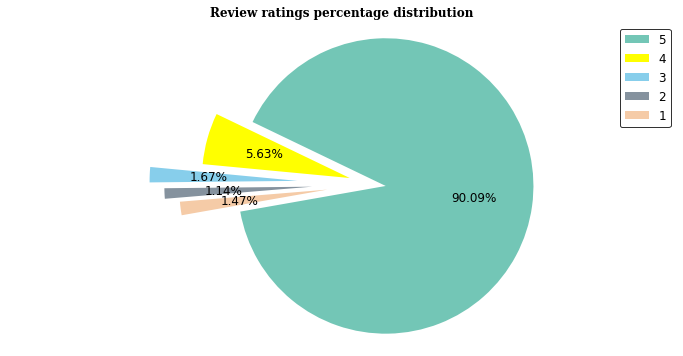

In [40]:
fig, ax = plt.subplots(figsize =(12, 6))
values = data2.rating.value_counts().sort_index(ascending=False)
plt.pie(values, autopct='%0.2f%%', startangle=190, explode=[0.1,0.15,0.5,0.4,0.3],
        colors =['#73C6B6','yellow','skyblue',"#85929E",'#F5CBA7'])
plt.legend(values.index,loc='best',fontsize=12,edgecolor = 'black')
plt.title("Review ratings percentage distribution",size=12, weight='bold', family='serif')
plt.axis('equal');

**Insights :**
- **95.72% reviews are positive**
- **1.67% reviews are neutral**
- **2.61% reviews are negative**

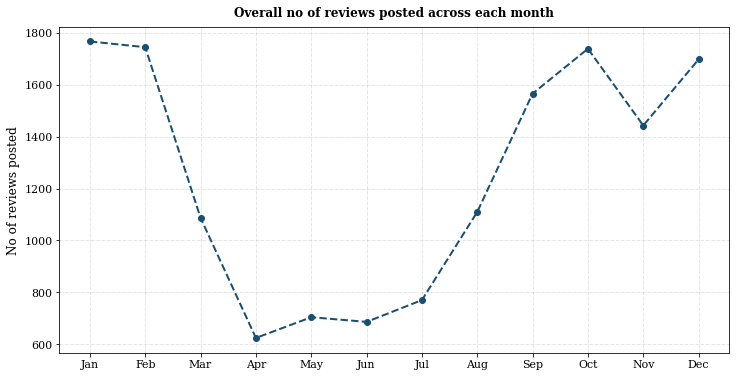

In [41]:
month = data2.groupby(['month'])['date_of_stay'].count()
fig, ax = plt.subplots(figsize =(12, 6))
plt.plot(month.index, month.values, 'o--',linewidth=2,color='#1B4F72');
labels= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.ylabel('No of reviews posted',size=12, family='serif')
plt.title("Overall no of reviews posted across each month", size=12,pad=10, weight='bold', family='serif') 
ax.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(labels)
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif');

**Insights :**
- **Most no of reviews were posted in January**
- **Least no of reviews were posted in April**
- **Peak season starts in September and continues till February**
- **The beginning of April until the end of July is the off-season time**

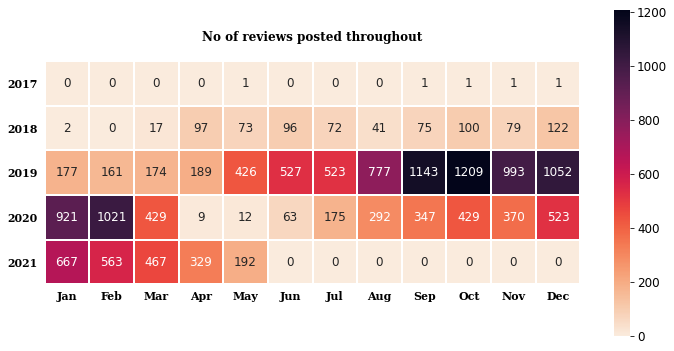

In [42]:
temp = pd.get_dummies(data2.month)
temp['year'] = data2['year']
heatdf = temp.groupby('year').sum()
fig, ax = plt.subplots(figsize =(12, 6))
sns.heatmap(heatdf, fmt="1.0f",annot=True, cmap='rocket_r',annot_kws={'size':12},square=True,linewidths=0.2);
plt.title("No of reviews posted throughout", size=12,pad=20, weight='bold', family='serif') 
ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5])
ax.set_xticklabels(labels)
plt.yticks(size=11, family='serif',rotation =0,weight='bold') 
plt.xticks(size=11, family='serif',weight='bold')
plt.ylabel('')
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none');

**Insights :** 
- **Highest number of reviews were posted in October 2019**
- **Due to the pandemic situation and strict lockdowns in March 2020, there was massive drop in customers visiting the hotels**
- **Only 9 reviews were posted in April 2020**

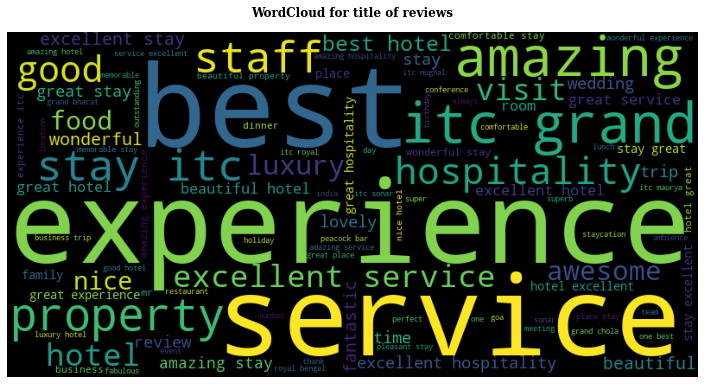

In [43]:
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width = 800, height =400, random_state=10,max_words=100).generate(" ".join(data2.review_title))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.title("WordCloud for title of reviews", size=12,pad=15, weight='bold', family='serif') 
plt.axis("off");

**Insights :**
- **Customers are talking about their experience, service they recieved, ITC brand, property etc.**
- **Best, service, experience, amazing, staff, good etc are the most occuring words in review title**

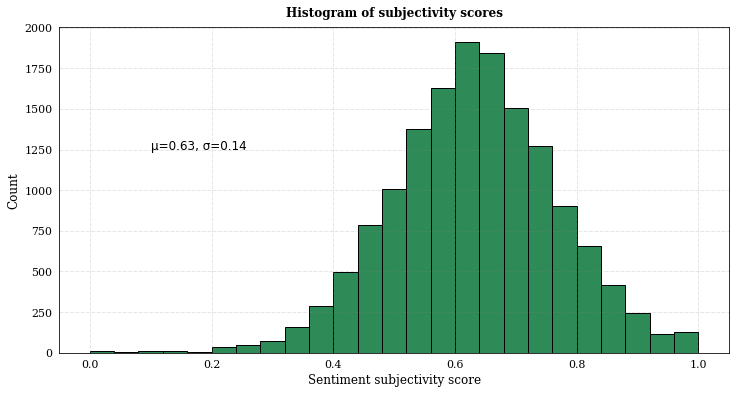

In [44]:
fig, ax = plt.subplots(figsize =(12, 6))
plt.hist(data2.subjectivity,edgecolor='black',bins=25,color='seagreen');
mean = round(data2.subjectivity.mean(),2)
std = round(data2.subjectivity.std(),2)
plt.text(0.1, 1250, 'µ={}, σ={}'.format(mean,std), size=12)
plt.title("Histogram of subjectivity scores", size=12,pad=10, weight='bold', family='serif') 
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif')
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
plt.xlabel('Sentiment subjectivity score',size=12, family='serif')
plt.ylabel('Count',size=12, family='serif')
ax.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4);

**Insights :**
- **There is a higher proportion of reviews where the subjectivity score tends to 1 compared to scores tending towards 0**
- **i.e Personal opinions expressed is higher than the factual information**
- **Mean subjectivity score is 0.63**

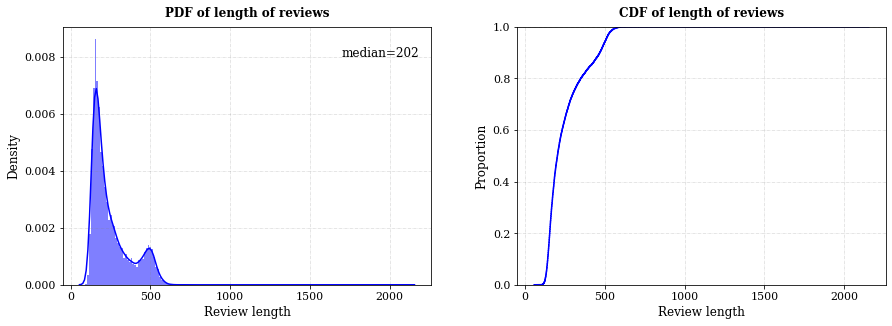

In [45]:
fig, ax = plt.subplots(figsize =(14, 6))

plt.subplot(1, 2, 1)
plt.title("PDF of length of reviews", size=12,pad=10, weight='bold', family='serif') 
sns.histplot(data2.review_length,kde=True, stat="density",linewidth=0, color='blue')
median = round(data2.review_length.median())
plt.text(1700,0.008, 'median={}'.format(median), size=12, family='serif')
plt.ylabel('Density',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif')
plt.xlabel('Review length',size=12, family='serif')

plt.subplot(1, 2, 2)
plt.tight_layout(pad=5)
plt.title("CDF of length of reviews", size=12,pad=10, weight='bold', family='serif') 
sns.ecdfplot(data2.review_length,color='blue')
plt.ylabel('Proportion',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif')
plt.xlabel('Review length',size=12, family='serif');

**Insights :**
- **94% reviews have review length less than 500 characters**
- **Median review length is 202 characters**
- **Most people tend to write shorter reviews**

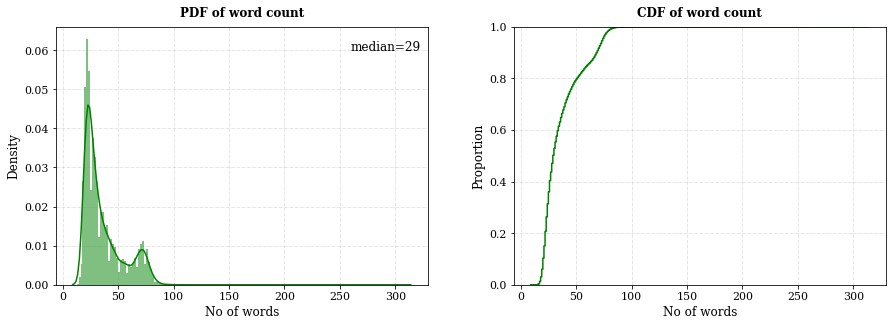

In [46]:
fig, ax = plt.subplots(figsize =(14, 6))

plt.subplot(1, 2, 1)
plt.title("PDF of word count", size=12,pad=10, weight='bold', family='serif') 
sns.histplot(data2.no_of_words,kde=True, stat="density",linewidth=0, color='green')
median = round(data2.no_of_words.median())
plt.text(260,0.06, 'median={}'.format(median), size=12, family='serif')
plt.ylabel('Density',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif')
plt.xlabel('No of words',size=12, family='serif')

plt.subplot(1, 2, 2)
plt.tight_layout(pad=5)
plt.title("CDF of word count", size=12,pad=10, weight='bold', family='serif') 
sns.ecdfplot(data2.no_of_words,color='green')
plt.ylabel('Proportion',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif')
plt.xlabel('No of words',size=12, family='serif');

**Insights :**
- **80% reviews have word count of less than 50 words**
- **Median word count in a review is 29 words**

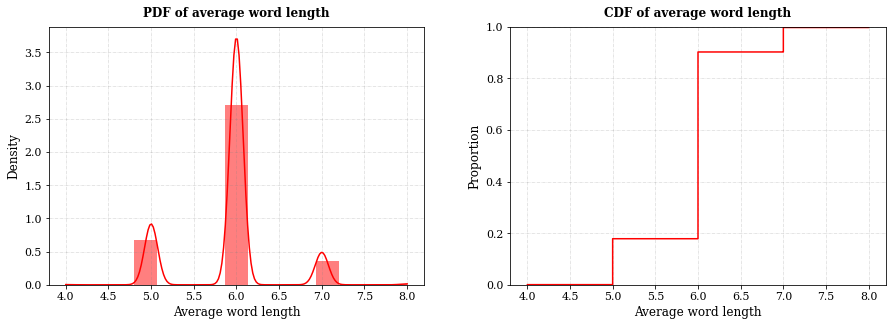

In [47]:
fig, ax = plt.subplots(figsize =(14, 6))

plt.subplot(1, 2, 1)
plt.title("PDF of average word length", size=12,pad=10, weight='bold', family='serif') 
sns.histplot(data2.avg_word_len,kde=True, stat="density",linewidth=0, color='red')
plt.ylabel('Density',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif')
plt.xlabel('Average word length',size=12, family='serif')

plt.subplot(1, 2, 2)
plt.tight_layout(pad=5)
plt.title("CDF of average word length", size=12,pad=10, weight='bold', family='serif') 
sns.ecdfplot(data2.avg_word_len,color='red')
plt.ylabel('Proportion',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(size=11, family='serif')
plt.xlabel('Average word length',size=12, family='serif');

**Insights :**
- **70% reviews have average word length of 6 characters**
- **Average word length of reviews ranges from 4 to 8 characters**

In [48]:
def get_top_ngrams(corpus, n,x): #function to get top n-grams
    text = ','.join(corpus)
    ngram = ngrams(text.split(),n) #Returns the ngrams generated from a sequence of items, as an iterator
    freq = collections.Counter(ngram) #Counter is an unordered collection where elements are stored as Dict keys and their count as dict value
    top10 = freq.most_common(x) #most_common() is used to produce a sequence of the n most frequently encountered input values and their respective counts

    gram,count= [],[]
    for i in top10:
        gram.append(" ".join(i[0]))
        count.append(i[1])
    return pd.DataFrame({'gram':gram,'freq':count})

An N-gram is a sequence of N tokens (or words)

Example - Data Science is very interesting

**Unigrams :** Unigram is a one-word sequence. For the above sentence, the unigrams would be 'Data','Science','is','very','interesting'
    
**Bigrams :** Bigram is a two-word sequence. For the above sentence, the bigrams would be 'Data Science','Science is', 'is very','very interesting'
    
**Trigrams :** Triigram is a three-word sequence. For the above sentence, the trigrams would be 'Data Science is','Science is very','is very interesting'

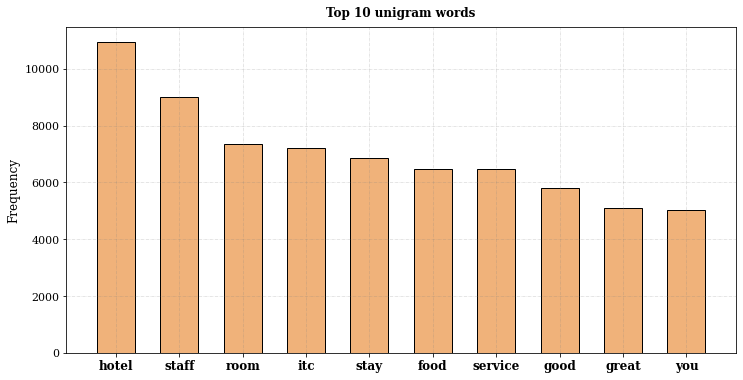

In [49]:
unigram = get_top_ngrams(data2.review_text,1,10)

fig, ax = plt.subplots(figsize =(12, 6))
plt.bar(unigram.gram, unigram.freq,width = 0.6,color='#F0B27A',edgecolor='black')
plt.title("Top 10 unigram words", size=12,pad=10, weight='bold', family='serif') 
plt.ylabel('Frequency',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(size=12, family='serif',weight='bold');

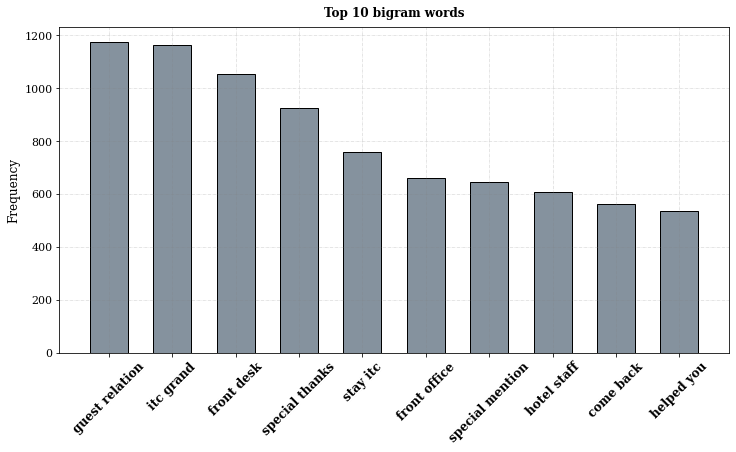

In [50]:
bigram = get_top_ngrams(data2.review_text,2,10)

fig, ax = plt.subplots(figsize =(12, 6))
plt.bar(bigram.gram, bigram.freq,width = 0.6,color='#85929E',edgecolor='black')
plt.title("Top 10 bigram words", size=12,pad=10, weight='bold', family='serif') 
plt.ylabel('Frequency',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(rotation = 45,size=12, family='serif',weight='bold');

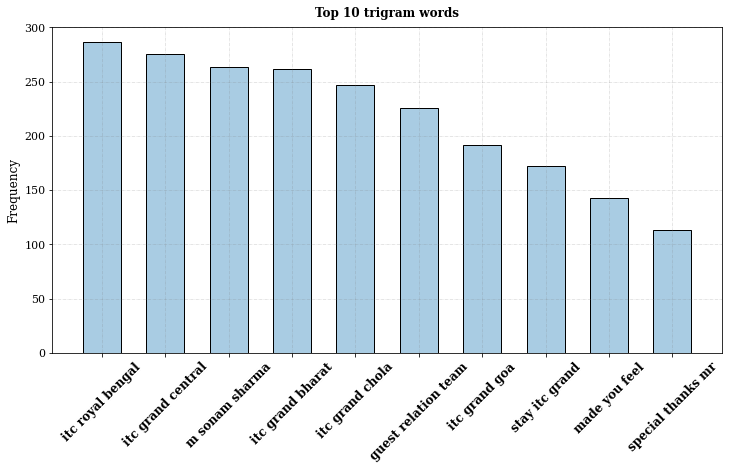

In [51]:
trigram = get_top_ngrams(data2.review_text,3,10)

fig, ax = plt.subplots(figsize =(12, 6))
plt.bar(trigram.gram, trigram.freq,width = 0.6,color='#A9CCE3',edgecolor='black')
plt.title("Top 10 trigram words", size=12,pad=10, weight='bold', family='serif') 
plt.ylabel('Frequency',size=12, family='serif')
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)
plt.yticks(size=11, family='serif') 
plt.xticks(rotation = 45,size=12, family='serif',weight='bold');

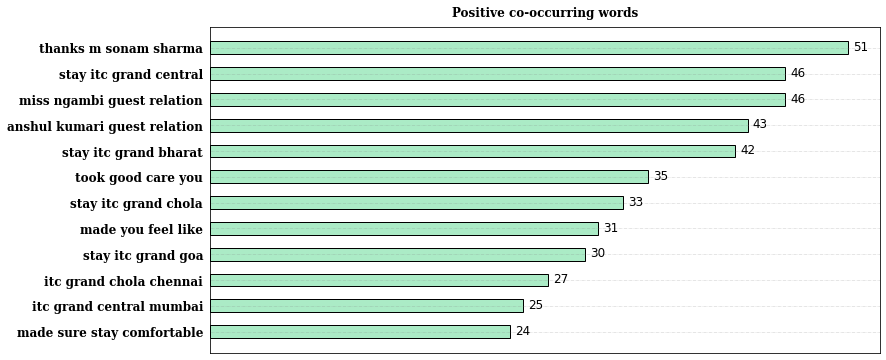

In [52]:
pos = data2[data2.rating > 3] 
pos_grams = get_top_ngrams(pos.review_text,4,12)

fig, ax = plt.subplots(figsize =(12, 6)) 
plt.barh(pos_grams.gram, pos_grams.freq,height = 0.5,color='#ABEBC6',edgecolor='black')
ax.invert_yaxis()
plt.title("Positive co-occurring words", size=12 ,pad=10, weight='bold', family='serif') 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.get_xaxis().set_visible(False) 
plt.yticks(size=12, family='serif',weight='bold') 
for i in ax.patches:  
    plt.text(i.get_width()+0.4, i.get_y()+0.35, i.get_width(), size=12)
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)

**Insights :**
- **In positive reviews, there is repetitive mention of hotel staff members like sonam sharma, miss ngambi and anshul kumari hence they definitely deserve a praise**

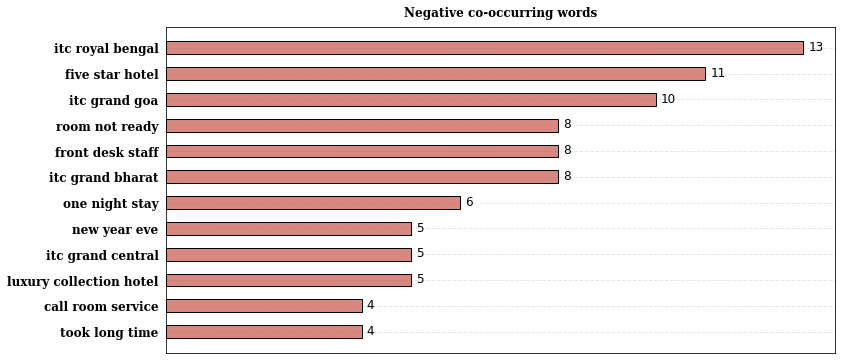

In [53]:
neg = data2[data2.rating <= 3]
neg_grams = get_top_ngrams(neg.review_text,3,12)

fig, ax = plt.subplots(figsize =(12, 6))
plt.barh(neg_grams.gram, neg_grams.freq ,height = 0.5,color='#D98880',edgecolor='black') 
ax.invert_yaxis()
plt.title("Negative co-occurring words", size=12 ,pad=10, weight='bold', family='serif') 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.get_xaxis().set_visible(False) 
plt.yticks(size=12, family='serif',weight='bold') 
for i in ax.patches:  
    plt.text(i.get_width()+0.1, i.get_y()+0.35, i.get_width(), size=12)
plt.grid(True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.4)

**Insights :**
- **In negative reviews, customers are not happy with front desk staff, room service etc.**
- **Also customers are expressing negative emotions about the new year eve celebrations in the hotels**

## Summary of insights

**Insights found from basic information about hotels :**
- ITC Kohenur, Hyderabad has # 1 rank out of 814 hotels in Hyderabad
- 11 out of 15 ITC hotels are included in top 10 hotels in their particular region
- ITC Grand Chola, Chennai has the highest number of rooms and ITC Grand Bharat, Gurugram has the lowest number of rooms
- ITC Maratha, Mumbai has the most restaurants nearby
- ITC Windsor, Bengaluru has the highest no of attractions nearby as compared to other hotels
- ITC Grand Goa has the least amount of options to dine out and also there are very few attractions nearby
- Median price range of hotels is ₹ 9000-16500
- Minimum price for any hotel is ₹ 4500. ITC Mughal, Agra is the most affordable hotel
- Maximum price for any hotel goes upto ₹ 33000. ITC Grand Bharat, Gurgaon is the most expensive hotel
- Overall 6 languages i.e (English, Hindi, Tamil, Nepali, Spanish, Japanese) are used for communication
- Out of 15 hotels, English and Hindi is spoken in every hotel
- Family is the most common hotel style followed by business, classic and cityview
- Each hotel has a rating of above 4.5 out of 5
- Prices of hotels in metro cities has less variation compared to hotels in non-metro cities

**Insights found from hotel reviews :** 
- Reviews  from 2017 to 2021
- Shortest review has 9 words and consists of 55 characters
- Longest review has 314 words and consists of 2156 characters
- 95.72% reviews are positive, 1.67% reviews are neutral, 2.61% reviews are negative
- Most no of reviews were posted in January and least no of reviews were posted in April
- Peak season starts in September and continues till February
- The beginning of April until the end of July is the off-season time
- Highest number of reviews were posted in October 2019
- Due to the pandemic situation and strict lockdowns in March 2020, there was massive drop in customers visiting the hotels. Only 9 reviews were posted in April 2020
- Best, service, experience, amazing, staff, good etc are the most occuring words in review title
- Personal opinions expressed in reviews is higher than the factual information given by the reviewer
- 94% reviews have review length less than 500 characters. Median review length is 202 characters. Most people tend to write shorter reviews
- 80% reviews have word count of less than 50 words. Median word count in a review is 29 words
- 70% reviews have average word length of 6 characters. Average word length of reviews ranges from 4 to 8 characters
- In positive reviews, there is repetitive mention of staff members like sonam sharma, miss ngambi and anshul kumari hence they definitely deserve a praise
- In negative reviews, customers are not happy with front desk staff, room service etc. Also customers are expressing negative emotions about the new year eve celebrations in the hotels

## References 

1. https://www.youtube.com/watch?v=RKsLLG-bzEY
2. https://www.youtube.com/watch?v=HVBk2Ge_Q98
3. https://jovian.ai/aakashns/python-web-scraping-and-rest-api
4. https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
5. https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/
6. https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
7. https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/
8. https://matplotlib.org/stable/gallery/index.html